In [1]:
!pip install openslide-python

In [4]:
!pip install slideio
!pip install opencv-python
# !apt update && apt install -y openslide-tools

'apt' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import sys
for p in sys.path:
    print(p)

In [89]:
!pip install keras


In [33]:
OPENSLIDE_PATH = r"C:\Users\shash\anaconda3\Lib\site-packages\openslide\openslide-win64-20171122\bin"

import os
os.environ['PATH'] = r"C:\Users\shash\anaconda3\Lib\site-packages\openslide\openslide-win64-20171122\bin" + ";" + os.environ['PATH']
if hasattr(os, 'add_dll_directory'):
     with os.add_dll_directory(OPENSLIDE_PATH):
         import openslide
else:
     import openslide

In [34]:
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [35]:
s = open_slide("Normal Lymphnode.svs")

s_props = s.properties
print(s_props)

<_PropertyMap {'aperio.AppMag': '40', 'aperio.MPP': '0.241158', 'openslide.comment': 'Aperio Image Library v10.2.24\r\r\n35817x38693 [0,0 35817x38693] [256x256] JPEG/YCbCr Q = 75|AppMag = 40|MPP = 0.241158', 'openslide.level-count': '3', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '38693', 'openslide.level[0].tile-height': '256', 'openslide.level[0].tile-width': '256', 'openslide.level[0].width': '35817', 'openslide.level[1].downsample': '4.0001075312368233', 'openslide.level[1].height': '9673', 'openslide.level[1].tile-height': '256', 'openslide.level[1].tile-width': '256', 'openslide.level[1].width': '8954', 'openslide.level[2].downsample': '16.003044636184825', 'openslide.level[2].height': '2418', 'openslide.level[2].tile-height': '256', 'openslide.level[2].tile-width': '256', 'openslide.level[2].width': '2238', 'openslide.mpp-x': '0.24115800000000001', 'openslide.mpp-y': '0.24115800000000001', 'openslide.objective-power': '40', 'openslide.quickhash-1': '30d7e

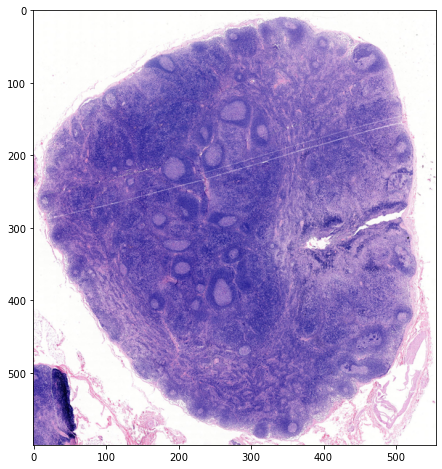

In [36]:
slide_thumb = s.get_thumbnail(size=(600, 600))
#slide_thumb_600.show()

slide_thumb_np = np.array(slide_thumb)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_np)

In [22]:
from openslide.deepzoom import DeepZoomGenerator

In [23]:
tiles = DeepZoomGenerator(s, tile_size=256, overlap=0, limit_bounds=False)

In [24]:
print("The number of levels in the tiles object are: ", tiles.level_count)
print("The dimensions of data in each level are: ", tiles.level_dimensions)


print("Total number of tiles = : ", tiles.tile_count)


The number of levels in the tiles object are:  17
The dimensions of data in each level are:  ((1, 1), (2, 2), (3, 3), (5, 5), (9, 10), (18, 19), (35, 38), (70, 76), (140, 152), (280, 303), (560, 605), (1120, 1210), (2239, 2419), (4478, 4837), (8955, 9674), (17909, 19347), (35817, 38693))
Total number of tiles = :  28409


In [25]:
cols, rows = tiles.level_tiles[16]

In [29]:
tile_dir = r"C:\images\Normal Lymphnode images"

In [30]:
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
        #print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(16, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        plt.imsave(tile_name + ".png", temp_tile_np)

In [58]:
orig_tile_dir_name = "C:\\images\\Normal Lymphnode images\\good"
norm_tile_dir_name = "C:\\images\\Normal Lymphnode images\\normalized"

In [62]:
for row in range(rows):
    for col in range(cols):
        tile_name = str(col) + "_" + str(row)
        #tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
        #print("Now processing tile with title: ", tile_name)
        temp_tile = tiles.get_tile(15, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        #Save original tile
        #tiff.imsave(orig_tile_dir_name+tile_name + "_original.tif", temp_tile_np)
        
        if temp_tile_np.mean() < 230 and temp_tile_np.std() > 15:
            #print("Processing tile number:", tile_name)
            norm_img, H_img, E_img = norm_HnE(temp_tile_np, Io=240, alpha=1, beta=0.15)
        #Save the norm tile, H and E tiles      
            
            plt.imsave(norm_tile_dir_name+tile_name + "_norm.png", norm_img)
            #tiff.imsave(H_tile_dir_name+tile_name + "_H.tif", H_img)
            #tiff.imsave(E_tile_dir_name+tile_name + "_E.tif", E_img)
            
        else:
            #print("NOT PROCESSING TILE:", tile_name)

SyntaxError: unexpected EOF while parsing (<ipython-input-62-c0f8418269e2>, line 22)

In [64]:
slide_normal = open_slide("Normal Lymphnode.svs") # Open the slide
tiles_normal= DeepZoomGenerator(slide_normal, tile_size=256, overlap=0, limit_bounds=False) # Create a DeepZoomGenerator object
cols, rows = tiles_normal.level_tiles[-1] # Get the number of tiles in the last level
print("Number of columns in the tiles object are: ", cols) # Print the number of columns
print("Number of rows in the tiles object are: ", rows) # Print the number of rows
tile_dir = r"C:\images\Normal Lymphnode images\Original" # Set the directory to save the tiles
for row in range(rows): # Loop through the rows
    for col in range(cols): # Loop through the columns 
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row)+'_Normal') # Create the tile name
        print("Now saving tile with title: ", tile_name) # Print the tile name
        temp_tile = tiles_normal.get_tile(16, (col, row)) # Get the tile
        temp_tile_RGB = temp_tile.convert('RGB') # Convert the tile to RGB
        temp_tile_np = np.array(temp_tile_RGB) # Convert the tile to a numpy array
        temp_tile_PIL = Image.fromarray(temp_tile_np) # Convert the numpy array to a PIL image
        temp_tile_PIL.save(tile_name + ".tif") # Save the tile

Number of columns in the tiles object are:  140
Number of rows in the tiles object are:  152
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\0_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\1_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\2_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\3_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\4_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\5_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\6_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\7_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\8_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\9_0_Normal
Now saving tile with title:  C:\images\Normal Lymphnode images\Good\10_0_Normal
Now saving tile with title:  C:\image

In [65]:
slide_reactive = open_slide("Reactive hyperplasia.svs") # Open the slide
tiles_reactive= DeepZoomGenerator(slide_reactive, tile_size=256, overlap=0, limit_bounds=False) # Create a DeepZoomGenerator object
cols, rows = tiles_reactive.level_tiles[-1] # Get the number of tiles in the last level
print("Number of columns in the tiles object are: ", cols) # Print the number of columns
print("Number of rows in the tiles object are: ", rows) # Print the number of rows 
tile_dir = r"C:\images\Reactive Hyperplasia\Original" # Set the directory to save the tiles
for row in range(rows): # Loop through the rows
    for col in range(cols): # Loop through the columns 
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row)+'_Reactive') # Create the tile name
        print("Now saving tile with title: ", tile_name) # Print the tile name
        temp_tile = tiles_reactive.get_tile(15, (col, row)) # Get the tile
        temp_tile_RGB = temp_tile.convert('RGB') # Convert the tile to RGB
        temp_tile_np = np.array(temp_tile_RGB) # Convert the tile to a numpy array
        temp_tile_PIL = Image.fromarray(temp_tile_np) # Convert the numpy array to a PIL image
        temp_tile_PIL.save(tile_name + ".tif") # Save the tile

Number of columns in the tiles object are:  103
Number of rows in the tiles object are:  108
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\0_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\1_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\2_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\3_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\4_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\5_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\6_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\7_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\8_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\9_0_Reactive
Now saving tile with title:  C:\images\Reactive Hyperplasia\Original\10_0_Reactive
Now 

In [69]:
from PIL import Image   # pip install pillow
import numpy as np # pip install numpy
from matplotlib import pyplot as plt # pip install matplotlib
import tifffile as tiff  # pip install tifffile

In [75]:
def find_mean_std_pixel_value(image): 
    avg = image.mean()  
    std = image.std() 
    avg_pixel_value=avg 
    std_pixel_value=std 

    return(avg_pixel_value, std_pixel_value)

In [79]:
import os # Import the os module
orig_tile_dir_name = r"C:\images\Normal Lymphnode images\Original" 
savings_dir_name = r"C:\images\Normal Lymphnode images\Good2" 
for file in os.listdir(orig_tile_dir_name): 
    if file.endswith(".tif"): 
        image = tiff.imread(orig_tile_dir_name+"\\"+file) 
        avg_pixel_value, std_pixel_value = find_mean_std_pixel_value(image)
        if std_pixel_value > 15 and avg_pixel_value <230 and image.shape[0]==256 and image.shape[1]==256: 
            path=savings_dir_name+"\\"+file.split(".")[0]+".tif" # Create the path to save the image
            tiff.imsave(path, image) 

In [81]:
orig_tile_dir_name = "C:\images\Reactive Hyperplasia\Original" 
savings_dir_name = "C:\images\Reactive Hyperplasia\Good" 
for file in os.listdir(orig_tile_dir_name): 
    if file.endswith(".tif"): 
        image = tiff.imread(orig_tile_dir_name+"\\"+file) 
        avg_pixel_value, std_pixel_value = find_mean_std_pixel_value(image) 
        if std_pixel_value > 15 and avg_pixel_value <230 and image.shape[0] == 256 and image.shape[1] == 256: 
            path=savings_dir_name+"\\"+file.split(".")[0]+".tif" 
            tiff.imsave(path, image) 

In [82]:
import numpy as np # pip install numpy
import cv2 # pip install opencv-python
from matplotlib import pyplot as plt # pip install matplotlib
def norm_HnE(img, Io=240, alpha=1, beta=0.15): # Function to normalize the HnE image
    ######## Step 1: Convert RGB to OD ###################
    #Read the above referenced papers on this topic. 
    HERef = np.array([[0.5626, 0.2159],
                      [0.7201, 0.8012],
                      [0.4062, 0.5581]])
    ### reference maximum stain concentrations for H&E
    maxCRef = np.array([1.9705, 1.0308])
    
    
    # extract the height, width and num of channels of image
    h, w, c = img.shape
    
    # reshape image to multiple rows and 3 columns.
    #Num of rows depends on the image size (wxh)
    img = img.reshape((-1,3))
    
    # calculate optical density
    # OD = −log10(I)  
    #OD = -np.log10(img+0.004)  #Use this when reading images with skimage
    #Adding 0.004 just to avoid log of zero. 
    
    OD = -np.log10((img.astype(np.float)+1)/Io) #Use this for opencv imread
    #Add 1 in case any pixels in the image have a value of 0 (log 0 is indeterminate)
    
    
    ############ Step 2: Remove data with OD intensity less than β ############
    # remove transparent pixels (clear region with no tissue)
    ODhat = OD[~np.any(OD < beta, axis=1)] #Returns an array where OD values are above beta
    #Check by printing ODhat.min()
    
    ############# Step 3: Calculate SVD on the OD tuples ######################
    #Estimate covariance matrix of ODhat (transposed)
    # and then compute eigen values & eigenvectors.
    eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))
    
    
    ######## Step 4: Create plane from the SVD directions with two largest values ######
    #project on the plane spanned by the eigenvectors corresponding to the two 
    # largest eigenvalues    
    That = ODhat.dot(eigvecs[:,1:3]) #Dot product
    
    ############### Step 5: Project data onto the plane, and normalize to unit length ###########
    ############## Step 6: Calculate angle of each point wrt the first SVD direction ########
    #find the min and max vectors and project back to OD space
    phi = np.arctan2(That[:,1],That[:,0])
    
    minPhi = np.percentile(phi, alpha)
    maxPhi = np.percentile(phi, 100-alpha)
    
    vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
    vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)
    
    
    # a heuristic to make the vector corresponding to hematoxylin first and the 
    # one corresponding to eosin second
    if vMin[0] > vMax[0]:    
        HE = np.array((vMin[:,0], vMax[:,0])).T
        
    else:
        HE = np.array((vMax[:,0], vMin[:,0])).T
    
    
    # rows correspond to channels (RGB), columns to OD values
    Y = np.reshape(OD, (-1, 3)).T
    
    # determine concentrations of the individual stains
    C = np.linalg.lstsq(HE,Y, rcond=None)[0]
    
    # normalize stain concentrations
    maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
    tmp = np.divide(maxC,maxCRef)
    C2 = np.divide(C,tmp[:, np.newaxis])
    
    ###### Step 8: Convert extreme values back to OD space
    # recreate the normalized image using reference mixing matrix 
    
    Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
    Inorm[Inorm>255] = 254
    Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  
    
    # Separating H and E components
    
    H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
    H[H>255] = 254
    H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)
    
    E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
    E[E>255] = 254
    E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)
    
    return (Inorm)

In [83]:
from PIL import Image # pip install pillow
import numpy as np # pip install numpy
from matplotlib import pyplot as plt # pip install matplotlib
import tifffile as tiff # pip install tifffile

In [86]:
normal_good_path=r"C:\images\Normal Lymphnode images\Good2" # Path to the good normal tiles
saving_dir=r"C:\images\Normal Lymphnode images\normalized" # Directory to save the normalized images
for filename in os.listdir(normal_good_path): # Loop through the files in the directory
    if filename.endswith(".tif"): # Check if the file is a tif file
        img=tiff.imread(normal_good_path+"\\"+filename) # Read the image
        try: # Try to normalize the image
            Inorm=norm_HnE(img) # Normalize the image
            tiff.imsave(saving_dir+"\\"+filename, Inorm) # Save the image
        except: # If the image is not normalized, print an error message
            print("Error in "+filename) # Print the error message

<ipython-input-82-7ec6b166b860>:81: RuntimeWarning: overflow encountered in exp
  Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
<ipython-input-82-7ec6b166b860>:81: RuntimeWarning: overflow encountered in multiply
  Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
<ipython-input-82-7ec6b166b860>:87: RuntimeWarning: overflow encountered in exp
  H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
<ipython-input-82-7ec6b166b860>:87: RuntimeWarning: overflow encountered in multiply
  H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
<ipython-input-82-7ec6b166b860>:38: RuntimeWarning: Degrees of freedom <= 0 for slice
  eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))


Error in 105_141_Normal.tif
Error in 105_149_Normal.tif
Error in 111_138_Normal.tif
Error in 113_146_Normal.tif
Error in 118_141_Normal.tif
Error in 128_119_Normal.tif
Error in 132_109_Normal.tif
Error in 135_109_Normal.tif
Error in 136_124_Normal.tif
Error in 15_140_Normal.tif
Error in 28_142_Normal.tif
Error in 31_146_Normal.tif


In [87]:
normal_good_path=r"C:\images\Reactive Hyperplasia\Good" # Path to the good reactive tiles
saving_dir=r"C:\images\Reactive Hyperplasia\Normalized1" # Directory to save the normalized images
for filename in os.listdir(normal_good_path): # Loop through the files in the directory
    if filename.endswith(".tif"): # Check if the file is a tif file
        img=tiff.imread(normal_good_path+"\\"+filename) # Read the image
        try: # Try to normalize the image
            Inorm=norm_HnE(img) # Normalize the image
            tiff.imsave(saving_dir+"\\"+filename, Inorm) # Save the image
        except: # If the image is not normalized, print an error message
            print("Error in "+filename) # Print the error message

In [ ]:
!pip install tensorflow

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
path=r"C:\images\train images"

batch_size = 64
img_height = 256
img_width = 256

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",batch_size=batch_size,
  seed=123,)

val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,batch_size=batch_size,
  subset="validation",
  seed=123)

Found 21280 files belonging to 2 classes.
Using 17024 files for training.
Found 21280 files belonging to 2 classes.
Using 4256 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Normal Lymphnode images', 'Reactive Hyperplasia']


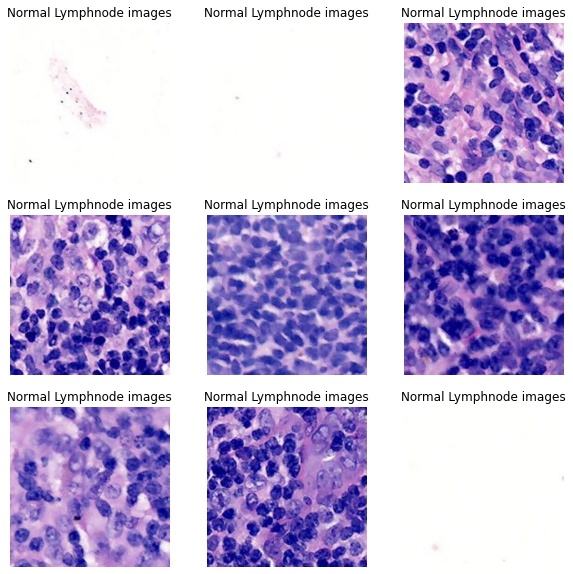

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [38]:
cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', baseline=0.99)

epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,callbacks=cb,
  epochs=epochs
)

Epoch 1/50
266/266 [==============================] - 586s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
266/266 [==============================] - 664s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


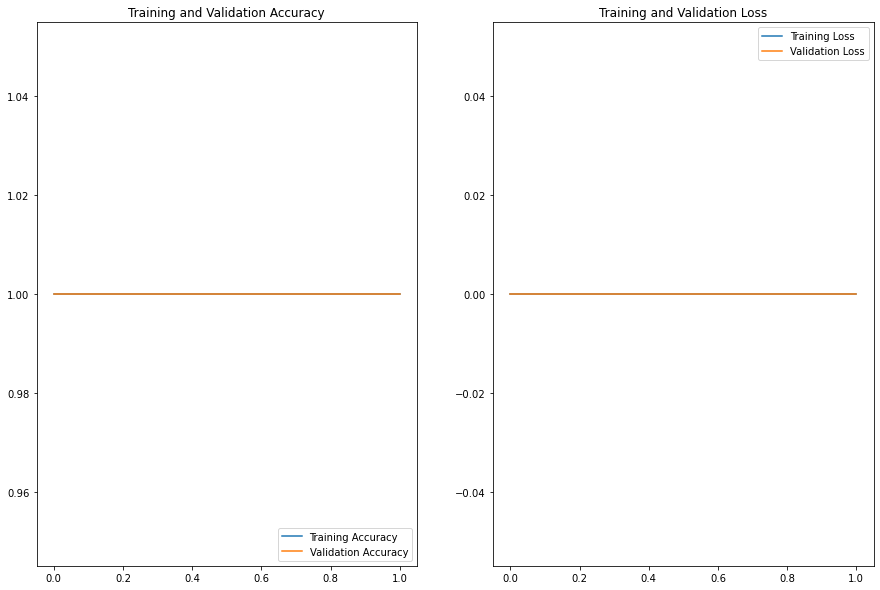

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(2)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
path=r"C:\images\train images\Reactive Hyperplasia\Normalized1\3_45_Reactive.tif"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 76ms/step
This image most likely belongs to Normal Lymphnode images with a 100.00 percent confidence.


In [31]:
model.save('slide_image_classifier.h5')